In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../data/processed/yp_competitors_rws_0001_0050_topics.csv')
df.head()

,lsi_topic_mode,lsi_topic_mode_prob,lsi_topic_list,lda_tfidf_topic_mode,lda_tfidf_topic_mode_prob,lda_tfidf_topic_list,lda_topic_mode,lda_topic_mode_prob,lda_topic_list
0,1,"2,1,1,3,1,1,1,1,1,1,2","[(2, 0.4399493553756362), (1, 0.13984257983645...",2,"2,2,0,3,1,0,4,2,2,3,0","[(2, 0.7852623), (2, 0.7581871), (0, 0.7754459...",2,"2,2,4,3,1,1,0,2,3,1,0","[(2, 0.9188336), (2, 0.68374145), (4, 0.714320..."
1,1,"1,1,1,1,1","[(1, 0.6279985372511367), (1, 0.21957472357741...",2,"2,1,0,2,3","[(2, 0.72668034), (1, 0.6504922), (0, 0.738564...",2,"2,4,4,2,3","[(2, 0.83854306), (4, 0.44837034), (4, 0.86481..."
2,1,"1,1,3,1,3,1,1,1,1,1,1,2,2,2","[(1, 0.07726233878657003), (1, 0.1571471562146...",3,"3,1,0,3,3,2,2,2,1,3,4,3,1,0","[(3, 0.6935361), (1, 0.78887224), (0, 0.772822...",3,"3,1,3,3,3,2,2,2,2,3,4,3,2,0","[(3, 0.7969227), (1, 0.9180037), (3, 0.8972089..."
3,1,"2,2,3,1,1,1,2,1,1,2,3,3,1,1,1,1,2,1,2,2,4,1,1,...","[(2, 0.3107561431458918), (2, 0.00869037334998...",3,"2,2,4,4,1,4,2,0,3,1,2,0,3,3,3,2,3,1,3,2,4,3,2,...","[(2, 0.8070065), (2, 0.5958185), (4, 0.4996323...",3,"2,2,2,4,1,4,2,0,3,1,2,0,3,3,3,0,3,3,3,2,1,3,2,...","[(2, 0.93289274), (2, 0.59560096), (2, 0.89829..."
4,1,"1,3,1,3,3,1,1,2,3,1","[(1, 0.04702133717154222), (3, 0.2518673567929...",1,"4,4,1,3,0,3,1,1,1,3","[(4, 0.7274414), (4, 0.74531406), (1, 0.797317...",3,"4,4,3,3,0,3,1,1,1,3","[(4, 0.83737105), (4, 0.86431074), (3, 0.92577..."


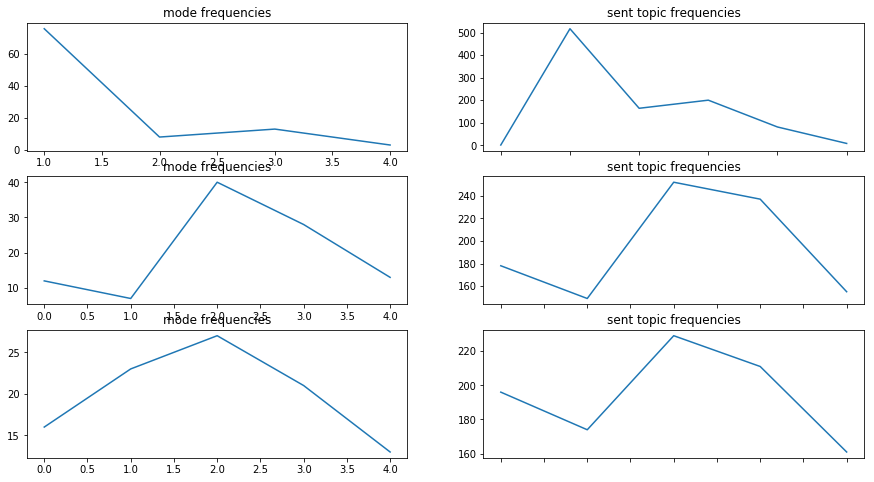

In [7]:
# all topics frequency distribution 
import matplotlib.pyplot as plt

topic_models_list = ['lsi_topic_mode', 'lda_topic_mode', 'lda_tfidf_topic_mode']
fig, axes = plt.subplots(3, 2, figsize=(15, 8))

for i, model in enumerate(topic_models_list):
    topic_freqs = df[model].value_counts().sort_index().plot(ax=axes[i, 0], title='mode frequencies')
    pd_topic_frequencies = df[model+'_prob'].apply(lambda x: pd.Series(x.split(',')).value_counts()).fillna(0)
    topic_sent_freqs = pd_topic_frequencies.sum().sort_index().plot(ax=axes[i, 1], title='sent topic frequencies')

plt.show()

In [6]:
df.lsi_topic_mode.value_counts()

0.0    17858
4.0      591
1.0      478
2.0       91
3.0        1
Name: lsi_topic_mode, dtype: int64

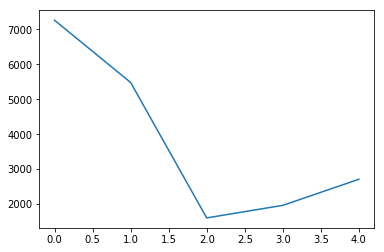

In [32]:
df.lda_topic_mode.value_counts().sort_index().plot()

In [17]:
pd_topic_frequencies = df.lda_topic_mode_prob.apply(lambda x: pd.Series(x.split(',')).value_counts()).fillna(0)
pd_topic_frequencies.head()

,1,2,0,4,3
0,4.0,3.0,2.0,2.0,0.0
1,3.0,1.0,0.0,1.0,0.0
2,2.0,1.0,5.0,5.0,1.0
3,7.0,10.0,7.0,5.0,5.0
4,3.0,0.0,4.0,1.0,2.0


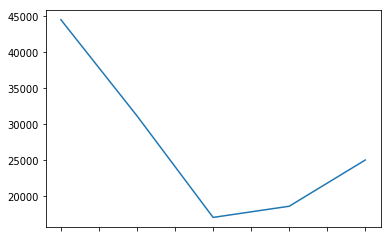

In [33]:
pd_topic_frequencies.sum().sort_index().plot()

In [67]:
from ast import literal_eval
df.lda_topic_list.apply(lambda x: literal_eval(x))

0      [(3, 0.66899663), (4, 0.50371903), (0, 0.64461...
1      [(1, 0.32851106), (0, 0.7329292), (2, 0.866291...
2      [(3, 0.79906136), (0, 0.39259952), (1, 0.76395...
3      [(2, 0.71843004), (3, 0.5987209), (3, 0.651143...
4      [(3, 0.5947283), (0, 0.5634973), (2, 0.3487434...
5      [(3, 0.86579376), (1, 0.88504833), (0, 0.37153...
6      [(3, 0.599212), (3, 0.5954598), (0, 0.8395318)...
7      [(3, 0.44484606), (3, 0.5483191), (1, 0.354427...
8      [(3, 0.9329004), (0, 0.46833846), (3, 0.592511...
9      [(0, 0.5965644), (3, 0.7444819), (0, 0.8366664...
10     [(2, 0.3692484), (2, 0.6651338), (2, 0.5978307...
11     [(3, 0.6012978), (0, 0.38507918), (3, 0.839409...
12     [(3, 0.74282974), (3, 0.9198717), (3, 0.678796...
13     [(3, 0.9266803), (3, 0.80463064), (0, 0.650083...
14     [(3, 0.8851719), (3, 0.49753532), (0, 0.708632...
15     [(3, 0.5308712), (4, 0.41583744), (2, 0.414031...
16     [(3, 0.65762854), (3, 0.53302866), (4, 0.44697...
17     [(1, 0.5354491), (0, 0.6